# Tests

In [1]:
from qibolab.pulses import Pulse, ReadoutPulse, DrivePulse, FluxPulse
from qibolab.pulses import PulseShape, Rectangular, Gaussian, Drag
from qibolab.pulses import PulseType, TimeVariable, PulseCollection, SplitPulse
import numpy as np

### TimeVariable

Initialisation

In [5]:
TimeVariable.clear_instances()

# def __init__(self, expression = 0, name:str = ''):
tv0 = TimeVariable(0)                       # Initialisation only with int expression. 
                                            # A unique name _tv is generated by the class
assert repr(tv0) == '_tv0: 0 = 0'

tv1 = TimeVariable(1, '_tv1')               # Initialisation with int expression and name
assert repr(tv1) == '_tv1: 1 = 1'

tv2 = TimeVariable('8 // 4')                # Initialisation with a string expression (when evaluated must return an int)
assert repr(tv2) == '_tv2: 8 // 4 = 2'

tv3 = TimeVariable('(_tv0 + 3)')            # Initialisation with a string expression using other TimeVariables
assert repr(tv3) == '_tv3: (_tv0 + 3) = 3'

tv4 = TimeVariable(tv3)                     # Initialisation with another TimeVariable
assert repr(tv4) == '_tv4: (_tv0 + 3) = 3'  # doing so copies the formula of the TimeVariable argument

tv5 = TimeVariable(tv3 * 3, '_tv5')         # # Initialisation with an expression that returns a TimeVariable
assert repr(tv5) == '_tv5: (_tv3 * 3) = 9'

In [5]:
tv0 = TimeVariable(10, '_tv0')              # Defining a new instance with an existing name overwrites the old definition 
assert repr(tv0) == '_tv0: 10 = 10'

In [6]:

TimeVariable.instances

{'_tv0': _tv0: 10 = 10,
 '_tv1': _tv1: 1 = 1,
 '_tv2': _tv2: 8 // 4 = 2,
 '_tv3': _tv3: (_tv0 + 3) = 13,
 '_tv4': _tv4: (_tv0 + 3) = 13,
 '_tv5': _tv5: (_tv3 * 3) = 39}

name

In [7]:
TimeVariable.clear_instances()

# @property
# def name(self) -> str:
t0 = TimeVariable(0, 't0')
assert t0.name == 't0'

# @name.setter
# def name(self, name:str):
t0.name = 'modified_t0'
assert t0.name == 'modified_t0'

In [8]:
assert repr(TimeVariable.instances) == "{'modified_t0': modified_t0: 0 = 0}"

In [9]:
# def __getitem__(self, name):
t1 = TimeVariable(1)['t1']          # Defining a new instance and renaming it to 't1' afterwards
assert t1.name == 't1'

# This abuse of the __getitem__ method, in conjunction with class operators allows this:
t2 = (t1 + 0)['t2']                 # operations between a TimeVariable and another TimeVariable or int
                                    # return a TimeVariable
assert t2.name == 't2'
assert repr(t2) == 't2: (t1 + 1) = 2'

In [10]:
TimeVariable.instances

{'modified_t0': modified_t0: 0 = 0, 't1': t1: 1 = 1, 't2': t2: (t1 + 1) = 2}

formula

In [11]:
TimeVariable.clear_instances()
t0 = TimeVariable(0, 't0')
t1 = (t0 + 5)['t1']
# @property
# def formula(self):
assert t1.formula == '(t0 + 5)'

In [12]:
# @formula.setter
# def formula(self, expression): # (self, expression:str|int|TimeVariable):
t1.formula = 7                      # setting TimeVariable formula using an int
assert t1.formula == '7'
assert t1.value == 7

t1.formula = '3 + 3'                # setting TimeVariable formula using a str expression
assert t1.formula == '3 + 3'
assert t1.value == 6

t1.formula = t0 + 1                 # setting TimeVariable formula using another TimeVariable
assert t1.formula == '(t0 + 1)'

assert repr(TimeVariable.instances) == "{'t0': t0: 0 = 0, 't1': t1: (t0 + 1) = 1, '_tv1': _tv1: (t0 + 1) = 1}"
# The evaluation of t0 + 1 as a TimeVariable has created a new record in TimeVariable.instances '_tv1'


In [13]:
TimeVariable.instances

{'t0': t0: 0 = 0, 't1': t1: (t0 + 1) = 1, '_tv1': _tv1: (t0 + 1) = 1}

value

In [14]:
TimeVariable.clear_instances()

# @property
# def value(self) -> int:
t0 = TimeVariable(77, 't0')
assert t0.value == 77

# @value.setter
# def value(self, value:int):
t0.value = 99                               # one can set a TimeVariable.value (only with an int)
assert t0.value == 99
assert t0.formula == '99'                   # the formula is updated accordingly

is_constant

In [15]:
TimeVariable.clear_instances()

# @property
# def is_constant(self) -> bool:

t0 = TimeVariable(0, 't0')
t1 = (2 * (t0 + 7))['t1']

assert t0.is_constant
assert not t1.is_constant

t1.value = 15

assert t1.is_constant

In [16]:
TimeVariable.instances

{'t0': t0: 0 = 0, '_tv0': _tv0: (t0 + 7) = 7, 't1': t1: 15 = 15}

CircularReferenceError

In [17]:
TimeVariable.clear_instances()

t0 = TimeVariable(0, 't0')
t1 = TimeVariable(t0 + 1, 't1')
CircularReferenceError_raised = False
ValueError_raised = False

try:
    t0 = TimeVariable(t1 + 1, 't0')
except TimeVariable.CircularReferenceError:
    CircularReferenceError_raised = True
except ValueError:
    ValueError_raised = True
except:
    assert False

assert CircularReferenceError_raised
assert not ValueError_raised
assert repr(t1) == 't1: (t0 + 1) = CircularReferenceError'

In [18]:
TimeVariable.instances

{'t0': t0: (t1 + 1) = CircularReferenceError,
 '_tv0': _tv0: (t0 + 1) = CircularReferenceError,
 't1': t1: (t0 + 1) = CircularReferenceError,
 '_tv1': _tv1: (t1 + 1) = CircularReferenceError}

evaluate

In [19]:
# def evaluate(self, expression:str, * previous_evaluations) -> int:



type conversions

In [20]:
assert int(TimeVariable(7)) == 7
assert float(TimeVariable(7)) == 7.0
assert str(TimeVariable(7)) == '7'

operators

In [21]:
TimeVariable.clear_instances()

assert TimeVariable(1) > TimeVariable(0)
assert TimeVariable(0) < TimeVariable(1)
assert TimeVariable(0) <= TimeVariable(0)
assert TimeVariable(0) <= TimeVariable(1)
assert TimeVariable(0) >= TimeVariable(0)
assert TimeVariable(1) >= TimeVariable(0)
assert TimeVariable(7) == TimeVariable(7)
assert TimeVariable(5) != TimeVariable(3)
t0 = TimeVariable(5)
t1 = (t0 + 2)
t2 = TimeVariable(7)
assert (t1 == t2) and (t1.formula != t2.formula) and (t1.value == t2.value)



In [2]:
TimeVariable.clear_instances()

t2 = TimeVariable(2)
t5 = TimeVariable(5)

tv_operation = t2 + 1
assert type(tv_operation) == TimeVariable and tv_operation.value == 3
tv_operation = t2 + t5
assert type(tv_operation) == TimeVariable and tv_operation.value == 7
tv_operation = 1 + t2
assert type(tv_operation) == TimeVariable and tv_operation.value == 3

tv_operation = t5 - 3
assert type(tv_operation) == TimeVariable and tv_operation.value == 2
tv_operation = t5 - t2
assert type(tv_operation) == TimeVariable and tv_operation.value == 3
tv_operation = 0 - t5
assert type(tv_operation) == TimeVariable and tv_operation.value == -5

tv_operation = t2 * 2
assert type(tv_operation) == TimeVariable and tv_operation.value == 4
tv_operation = t2 * t5
assert type(tv_operation) == TimeVariable and tv_operation.value == 10
tv_operation = 3 * t2
assert type(tv_operation) == TimeVariable and tv_operation.value == 6

tv_operation = t5 // 2
assert type(tv_operation) == TimeVariable and tv_operation.value == 2
tv_operation = t5 // t2
assert type(tv_operation) == TimeVariable and tv_operation.value == 2
tv_operation = 5 // t2
assert type(tv_operation) == TimeVariable and tv_operation.value == 2

tv_operation = t5 % 2
assert type(tv_operation) == TimeVariable and tv_operation.value == 1
tv_operation = t5 % t2
assert type(tv_operation) == TimeVariable and tv_operation.value == 1
tv_operation = 5 % t2
assert type(tv_operation) == TimeVariable and tv_operation.value == 1

tv_operation = -t2
assert type(tv_operation) == TimeVariable and tv_operation.value == -2

In [3]:
TimeVariable.clear_instances()

t2 = TimeVariable(2)
t5 = TimeVariable(5)
t10 = TimeVariable(10)

t = TimeVariable(2)
t += 1
assert type(t) == TimeVariable and t.value == 3

t = TimeVariable(5)
t -= 1
assert type(t) == TimeVariable and t.value == 4

t = TimeVariable(10)
t *= 2
assert type(t) == TimeVariable and t.value == 20

t = TimeVariable(5)
t //= 2
assert type(t) == TimeVariable and t.value == 2

t = TimeVariable(5)
t %= 2
assert type(t) == TimeVariable and t.value == 1


### Pulse

Initialisation

In [2]:
# def __init__(self, start:int | TimeVariable, duration:int | TimeVariable, amplitude:float, 
#                    frequency:int, relative_phase:float, shape: PulseShape | str,
#                    channel: int | str, type: PulseType | str  = PulseType.DRIVE, qubit: int | str = 0):

# standard initialisation
p0 = Pulse(start = 0, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 0.0, 
           shape = Rectangular(), 
           channel = 0, 
           type = PulseType.READOUT, 
           qubit = 0)
assert repr(p0) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0, PulseType.READOUT)'

# initialisation with TimeVariables
t1 = TimeVariable(100, 't1')
d1 = TimeVariable(50, 'd1')
p1 = Pulse(start = t1, 
           duration = d1, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 0.0, 
           shape = Rectangular(), 
           channel = 0, 
           type = PulseType.READOUT, 
           qubit = 0)
assert repr(p1) == 'Pulse(100, 50, 0.9, 20_000_000, 0, Rectangular(), 0, PulseType.READOUT)'

# initialisation with non int (float) frequency
p2 = Pulse(start = 0, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20e6, 
           relative_phase = 0, 
           shape = Rectangular(), 
           channel = 0, 
           type = PulseType.READOUT, 
           qubit = 0)
assert repr(p2) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0, PulseType.READOUT)'
assert type(p2.frequency) == int and p2.frequency == 20_000_000

# initialisation with non float (int) relative_phase
p3 = Pulse(start = 0, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 1, 
           shape = Rectangular(), 
           channel = 0, 
           type = PulseType.READOUT, 
           qubit = 0)
assert repr(p3) == 'Pulse(0, 50, 0.9, 20_000_000, 1, Rectangular(), 0, PulseType.READOUT)'
assert type(p3.relative_phase) == float and p3.relative_phase == 1.0

# initialisation with str shape
p4 = Pulse(start = 0, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 0, 
           shape = 'Rectangular()', 
           channel = 0, 
           type = PulseType.READOUT, 
           qubit = 0)
assert repr(p4) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0, PulseType.READOUT)'

# initialisation with str channel and str qubit
p5 = Pulse(start = 0, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 0, 
           shape = 'Rectangular()', 
           channel = 'channel0', 
           type = PulseType.READOUT, 
           qubit = 'qubit0')
assert repr(p5) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), channel0, PulseType.READOUT)'
assert p5.qubit == 'qubit0'

# initialisation with different frequencies, shapes and types
p6 = Pulse(0, 40, 0.9, -50e6, 0, Rectangular(), 0, PulseType.READOUT)
p7 = Pulse(0, 40, 0.9, 0, 0, Rectangular(), 0, PulseType.FLUX)
p8 = Pulse(0, 40, 0.9, 50e6, 0, Gaussian(5), 0, PulseType.DRIVE)
p9 = Pulse(0, 40, 0.9, 50e6, 0, Drag(5,2), 0, PulseType.DRIVE)




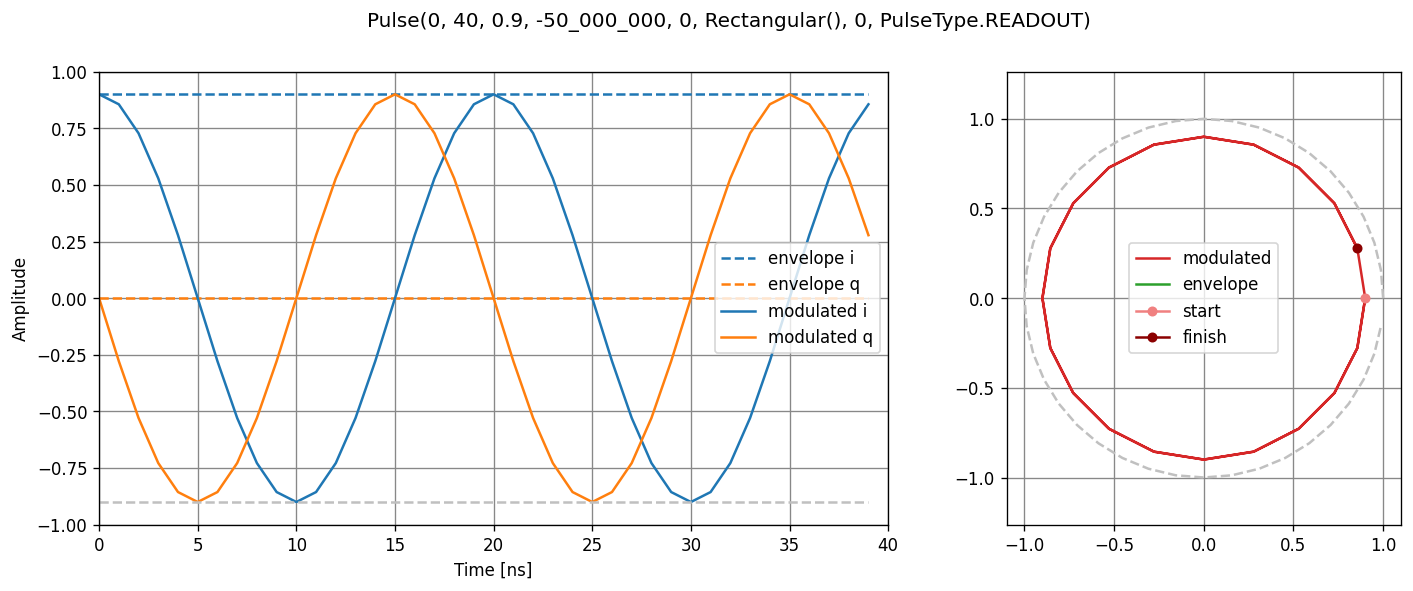

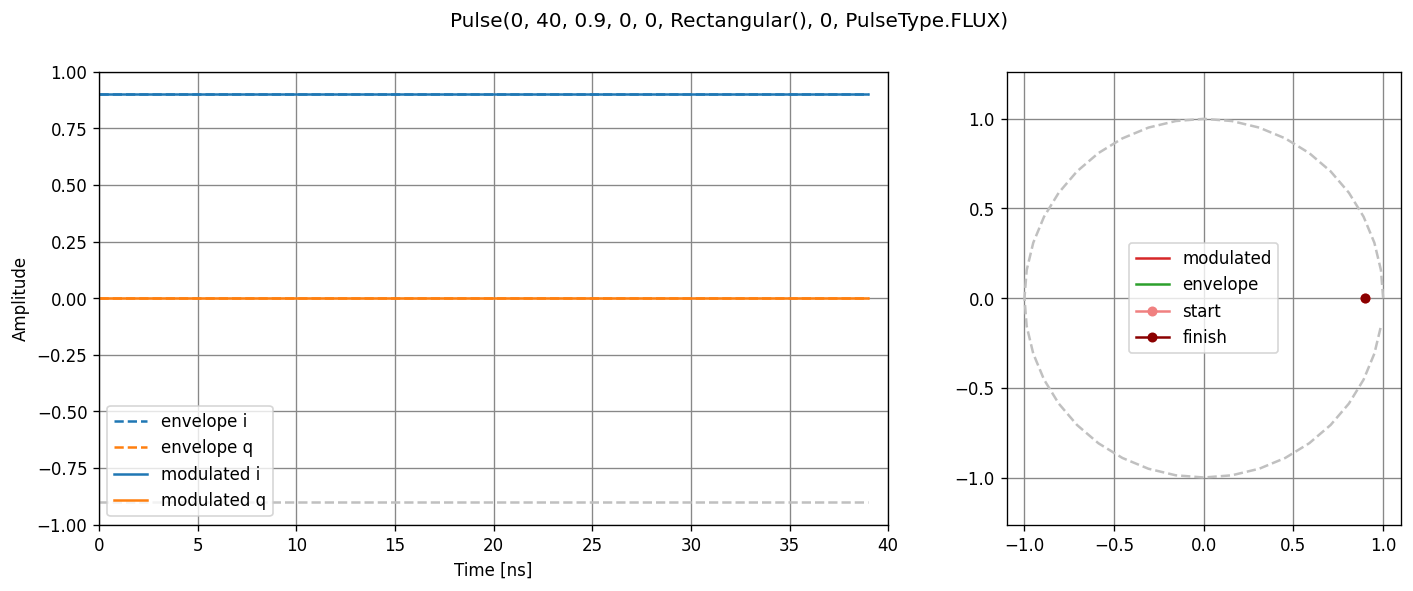

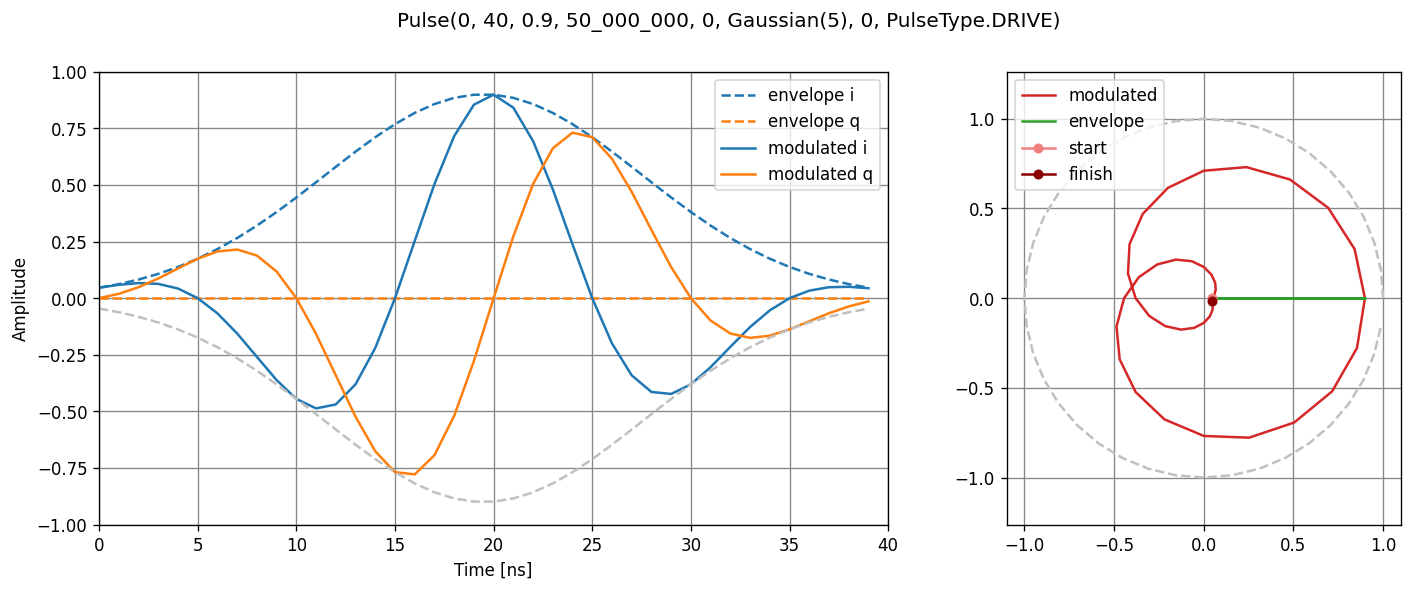

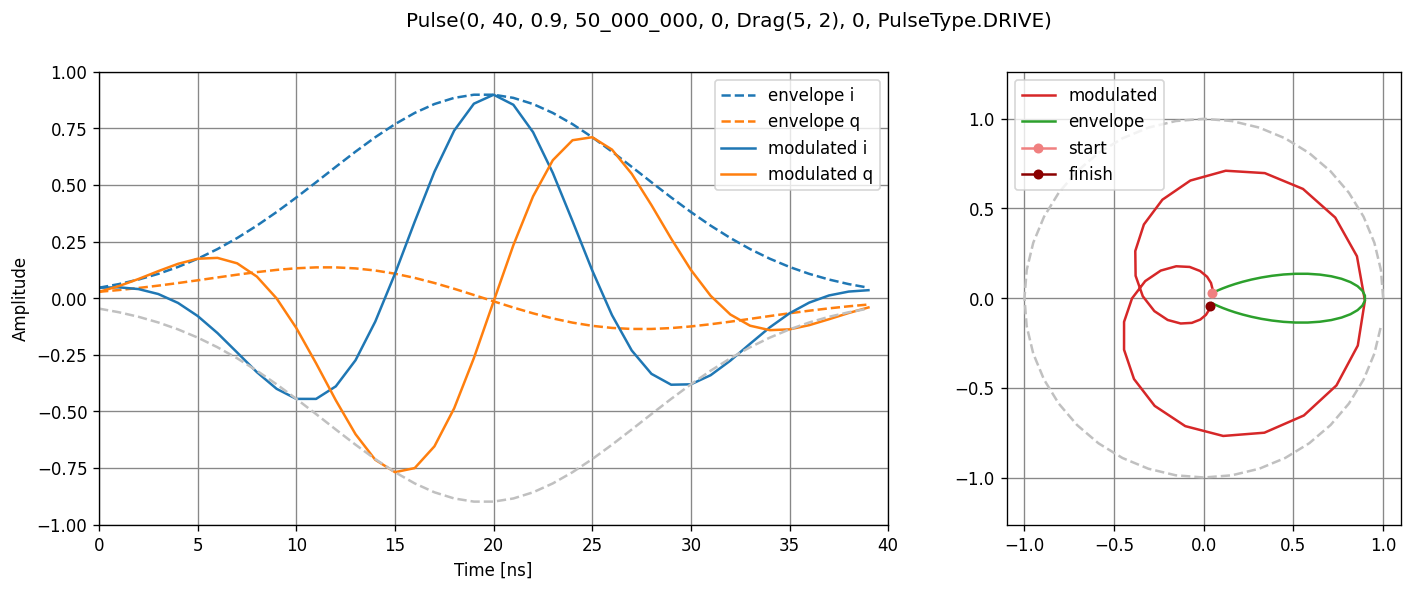

In [3]:
p6.plot()
p7.plot()
p8.plot()
p9.plot()

attributes

In [4]:
channel = 0
qubit = 0

p10 = Pulse(start = 10, 
           duration = 50, 
           amplitude = 0.9, 
           frequency = 20_000_000, 
           relative_phase = 0.0, 
           shape = Rectangular(), 
           channel = channel, 
           type = PulseType.READOUT, 
           qubit = qubit)

assert type(p10.start) == int and p10.start == 10
assert type(p10.duration) == int and p10.duration == 50
assert type(p10.amplitude) == float and p10.amplitude == 0.9
assert type(p10.frequency) == int and p10.frequency == 20_000_000
assert isinstance(p10.shape, PulseShape) and repr(p10.shape) == "Rectangular()"
assert type(p10.channel) == type(channel) and p10.channel == channel
assert type(p10.qubit) == type(qubit) and p10.qubit == qubit
assert type(p10.finish) == int and p10.finish == 60



In [5]:
ValueError_raised = False
try: 
    p10 = Pulse(start = -10, # Start should be >= 0
            duration = 50, 
            amplitude = 0.9, 
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = channel, 
            type = PulseType.READOUT, 
            qubit = qubit)
except ValueError:
    ValueError_raised = True
except:
    assert False
assert ValueError_raised

In [6]:
ValueError_raised = False
try: 
    p10 = Pulse(start = 0,
            duration = 0, # duration should be > 0
            amplitude = 0.9, 
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = channel, 
            type = PulseType.READOUT, 
            qubit = qubit)
except ValueError:
    ValueError_raised = True
except:
    assert False
assert ValueError_raised

In [7]:
ValueError_raised = False
try: 
    p10 = Pulse(start = 0,
            duration = 50, 
            amplitude = 1.1, # amplitude should be >= 0 & <= 1
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = channel, 
            type = PulseType.READOUT, 
            qubit = qubit)
except ValueError:
    ValueError_raised = True
except:
    assert False
assert ValueError_raised

In [10]:
ValueError_raised = False
try: 
    p10 = Pulse(start = 0,
            duration = 50, 
            amplitude = 0.9, 
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = 'NonImplementedShape()', 
            channel = channel, 
            type = PulseType.READOUT, 
            qubit = qubit)
except ValueError:
    ValueError_raised = True
except:
    assert False
assert ValueError_raised

serial

In [2]:
p11 = Pulse(0, 40, 0.9, 50_000_000, 0, Gaussian(5), 0, PulseType.DRIVE)
assert p11.serial == 'Pulse(0, 40, 0.9, 50_000_000, 0, Gaussian(5), 0, PulseType.DRIVE)'
assert repr(p11) == p11.serial

Sampling Rate

In [13]:
p12 = Pulse(0, 40, 0.9, 100e6, 0, Rectangular(), 0, PulseType.DRIVE)
p13 = Pulse(0, 40, 0.9, 100e6, 0, Gaussian(5), 0, PulseType.DRIVE)
p14 = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)

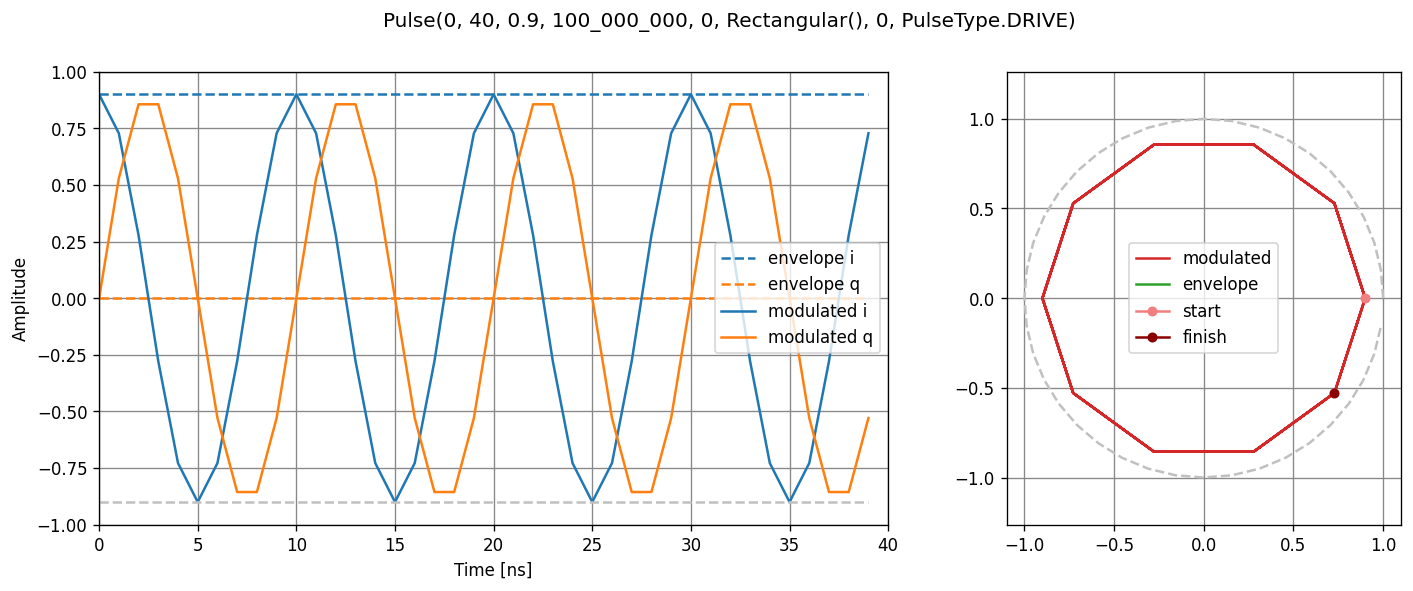

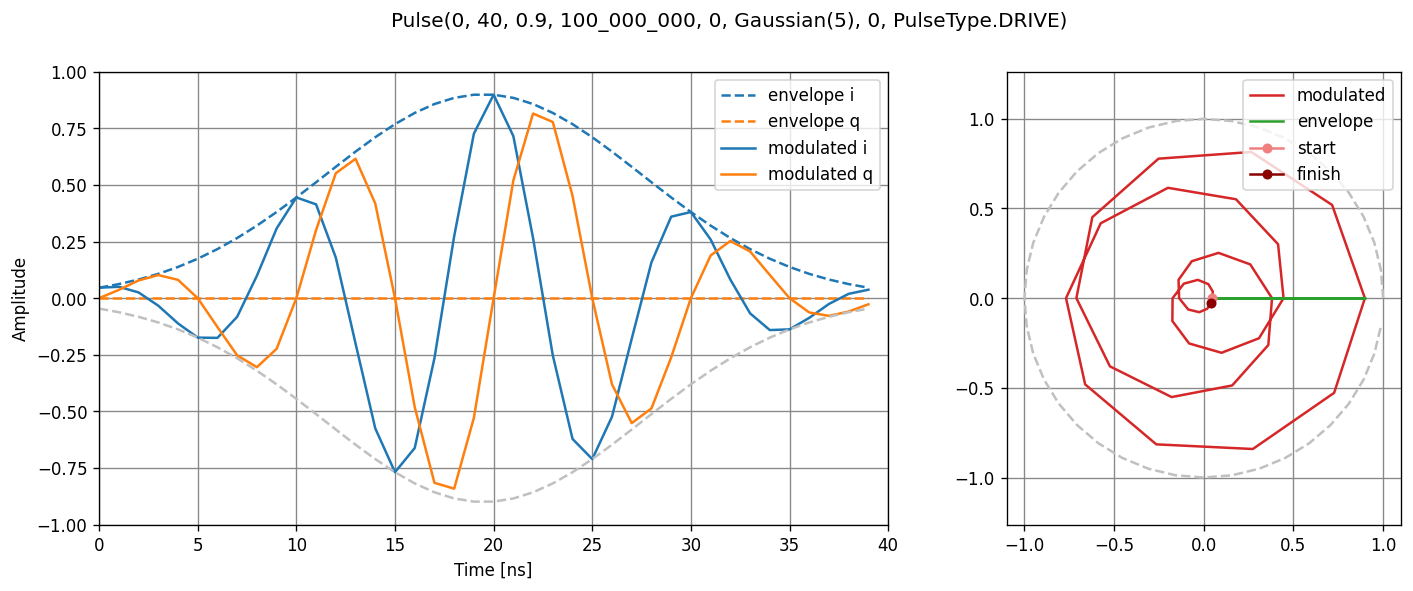

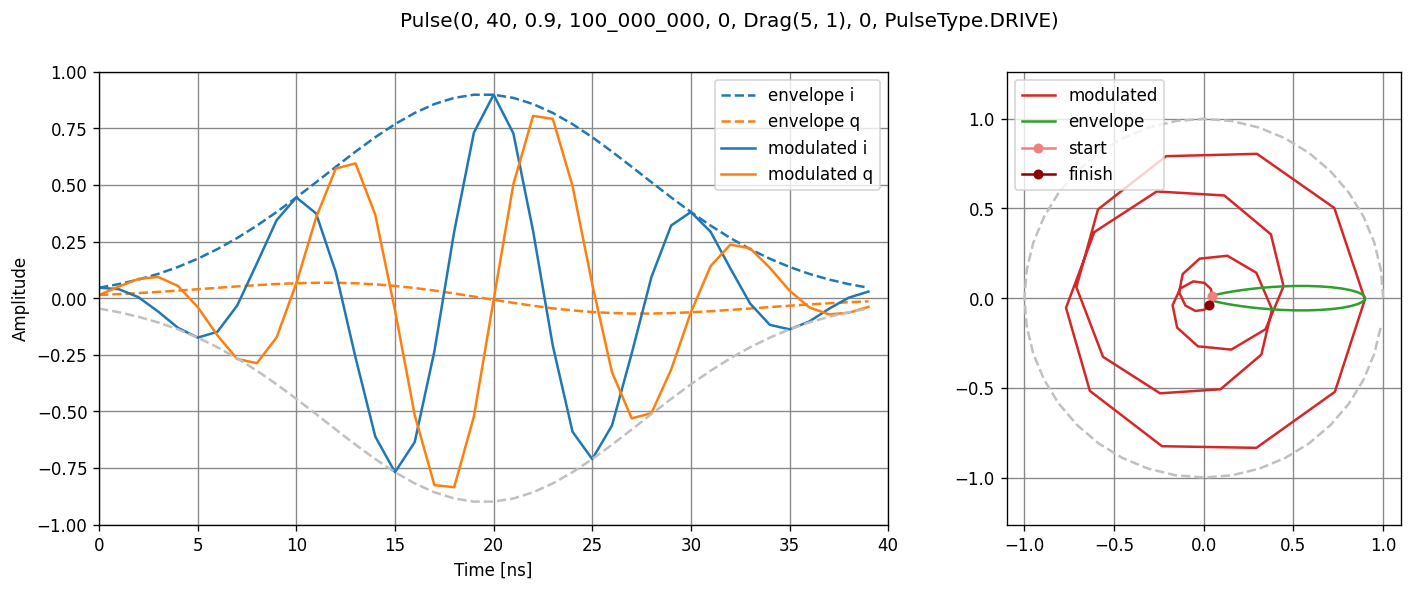

In [14]:
tmp = PulseShape.SAMPLING_RATE
PulseShape.SAMPLING_RATE = 1e9
p12.plot()
p13.plot()
p14.plot()
PulseShape.SAMPLING_RATE = tmp

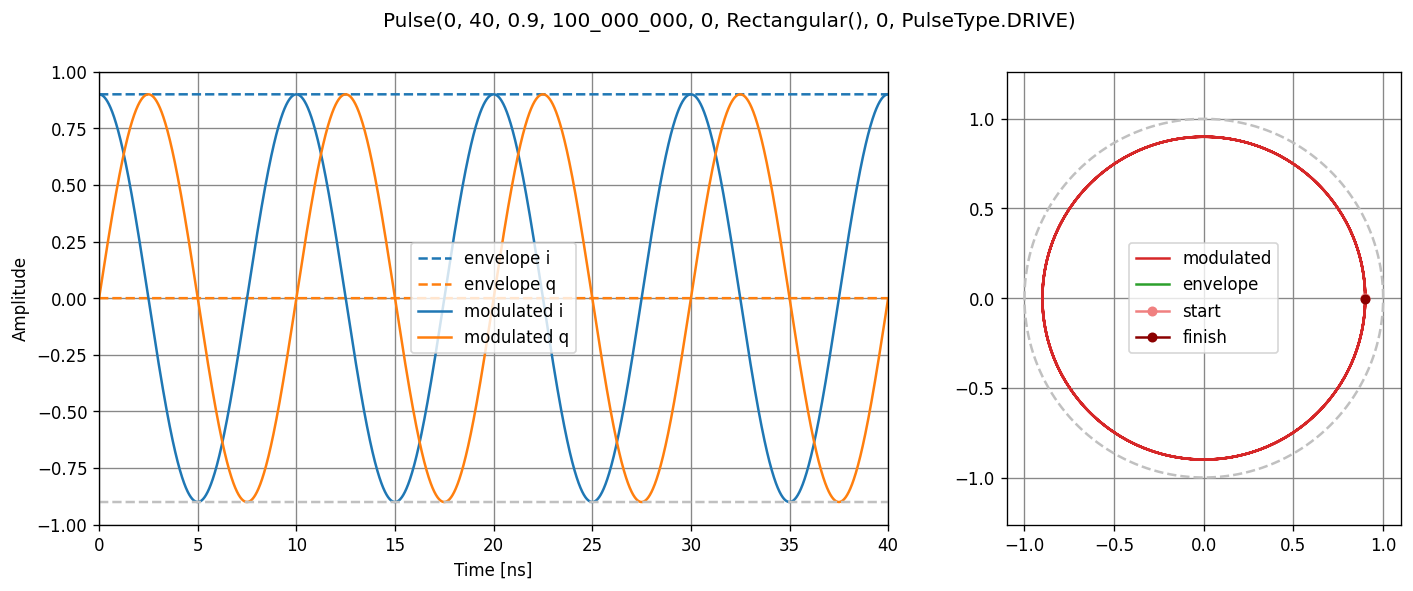

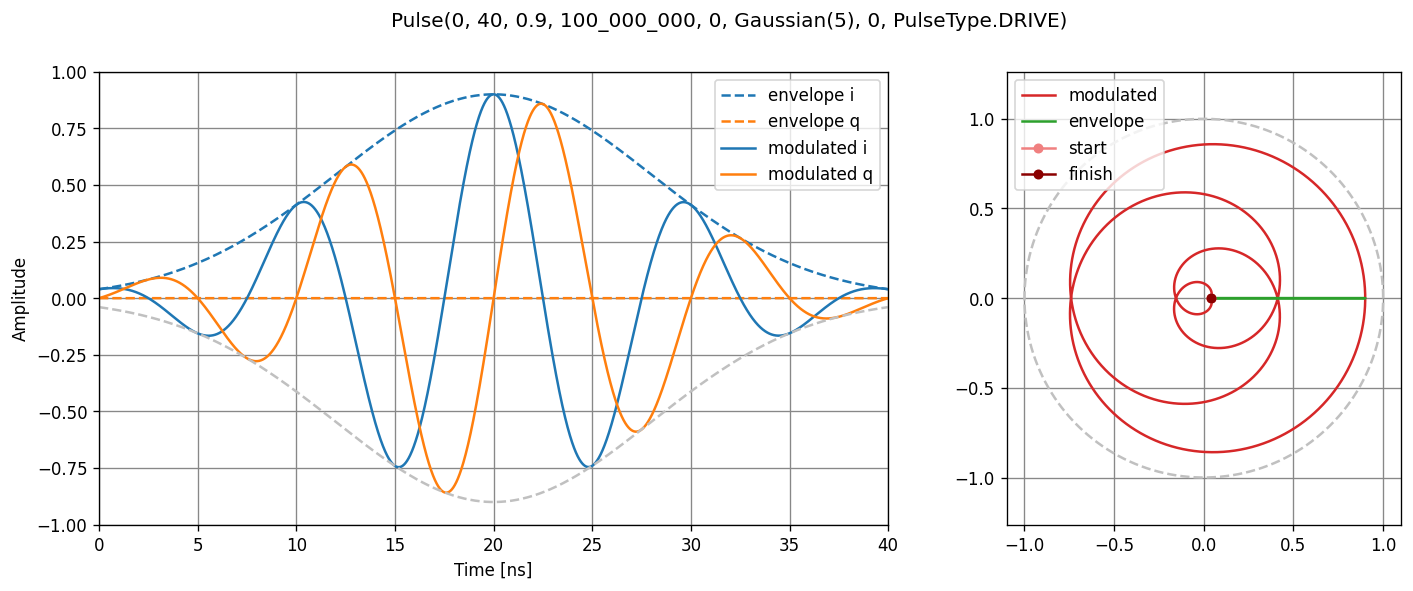

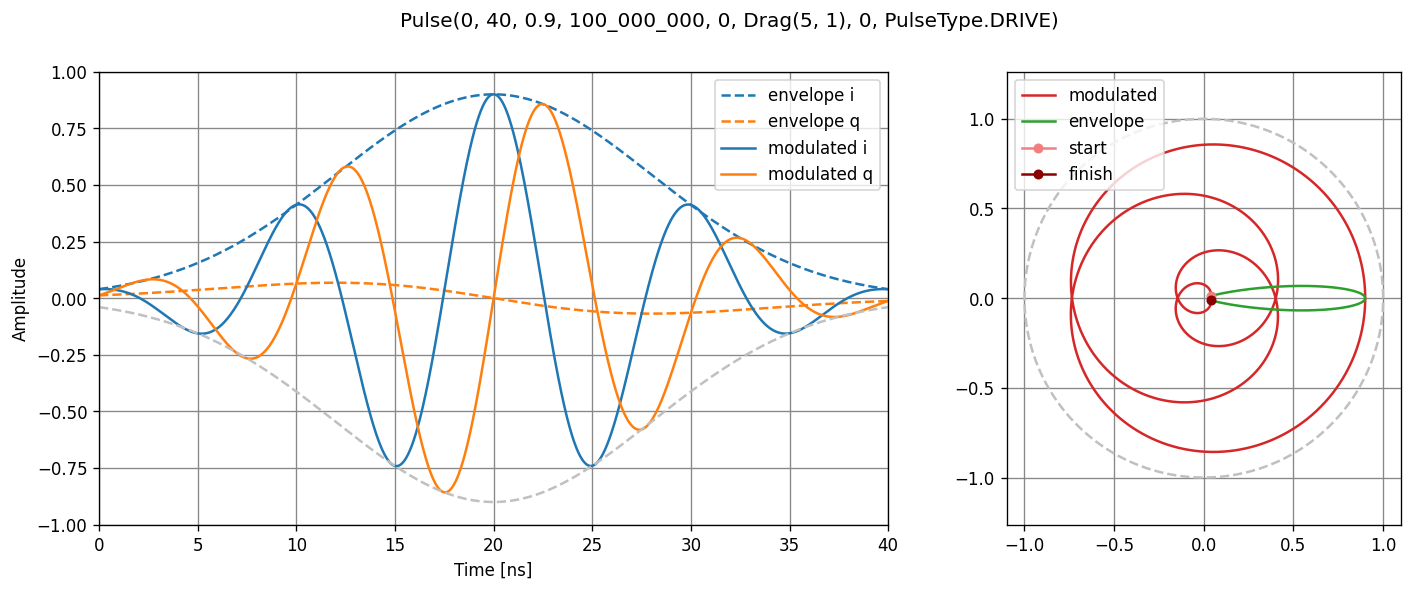

In [15]:
tmp = PulseShape.SAMPLING_RATE
PulseShape.SAMPLING_RATE = 100e9
p12.plot()
p13.plot()
p14.plot()
PulseShape.SAMPLING_RATE = tmp

Drag Shape

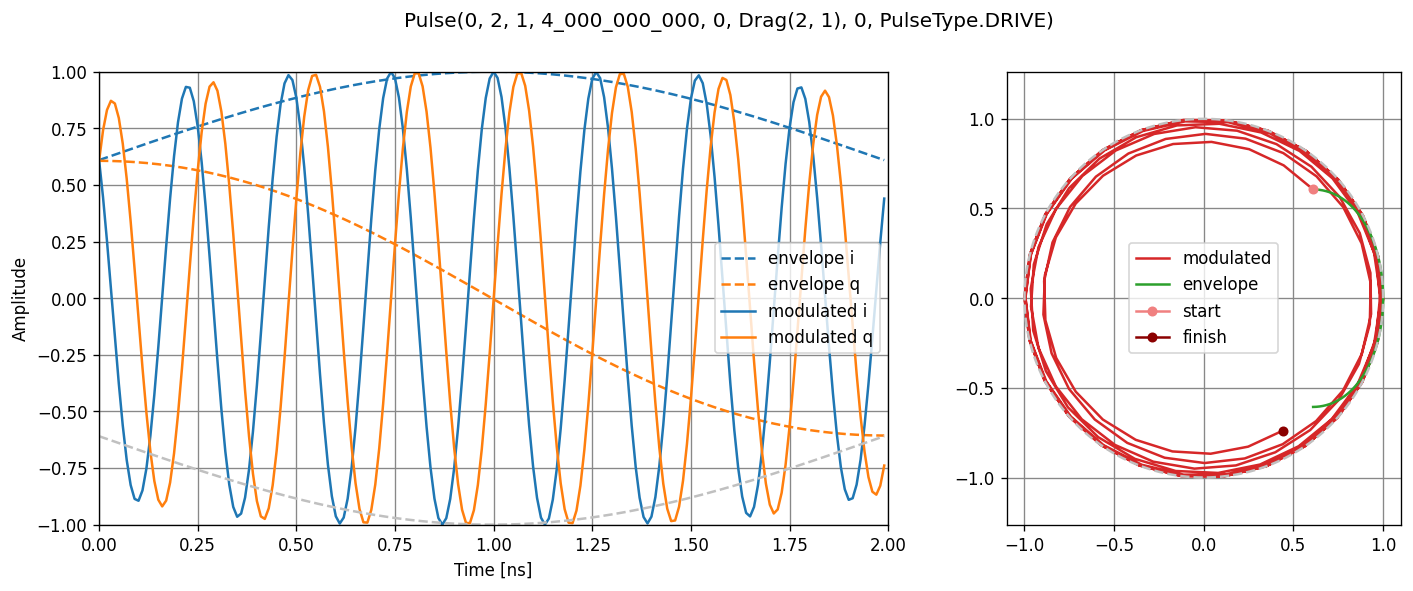

In [18]:
tmp = PulseShape.SAMPLING_RATE
dp = Pulse(0, 2, 1, 4e9, 0, Drag(2,1), 0, PulseType.DRIVE)
PulseShape.SAMPLING_RATE = 100e9
dp.plot()
PulseShape.SAMPLING_RATE = tmp
# envelope i & envelope q should cross nearly at 0

hash

In [25]:
rp = Pulse(0, 40, 0.9, 100e6, 0, Rectangular(), 0, PulseType.DRIVE)
dp = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
hash(rp)
my_dict = {rp: 1, dp: 2}
assert list(my_dict.keys())[0] == rp
assert list(my_dict.keys())[1] == dp

In [30]:
p1 = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
p2 = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)

assert p1 == p2

In [38]:
t0 = TimeVariable(0, 't0')
t1 = TimeVariable(0, 't1')
p1 = Pulse(t0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
p2 = Pulse(t1, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
assert p1 == p2
t0 +=100
assert p1 != p2

deep_copy and shallow_copy

In [2]:
t0 = TimeVariable(0, 't0')
p1 = Pulse(t0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
p2 = p1.shallow_copy()
p3 = p1.deep_copy()
assert p1 == p2
assert p1 == p3
t0 +=100
assert p1 == p2
assert p1 != p3


ReadoutPulse, DrivePulse & FluxPulse Aliases

In [13]:
rop = ReadoutPulse(start = 0,
            duration = 50, 
            amplitude = 0.9, 
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = 0, 
            qubit = 0)
assert repr(rop) == 'ReadoutPulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0)'

dp = DrivePulse(start = 0,
            duration = 2000, 
            amplitude = 0.9, 
            frequency = 200_000_000, 
            relative_phase = 0.0, 
            shape = Gaussian(5), 
            channel = 0, 
            qubit = 0)
assert repr(dp) == 'DrivePulse(0, 2000, 0.9, 200_000_000, 0, Gaussian(5), 0)'

fp = FluxPulse(start = 0,
            duration = 300, 
            amplitude = 0.9, 
            frequency = 0.0, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = 0, 
            qubit = 0)
assert repr(fp) == 'FluxPulse(0, 300, 0.9, 0, 0, Rectangular(), 0)'



SplitPulse

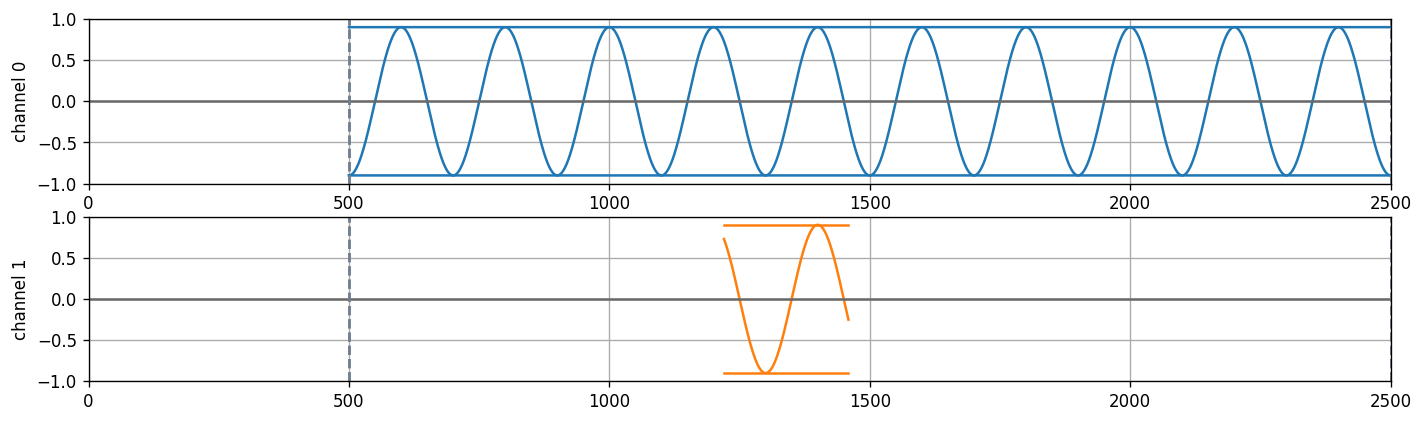

In [3]:
dp = Pulse(start = 500,
            duration = 2000, 
            amplitude = 0.9, 
            frequency = 5_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = 0, 
            type = PulseType.READOUT,
            qubit = 0)

sp = SplitPulse(dp)
sp.channel = 1
a = 720
b = 960
sp.window_start = sp.start + a
sp.window_finish = sp.start + b
assert sp.window_start == sp.start + a
assert sp.window_finish == sp.start + b
pc = PulseCollection(dp, sp)
pc.plot()
assert len(sp.envelope_waveform_i) == b - a
assert len(sp.envelope_waveform_q) == b - a
assert len(sp.modulated_waveform_i) == b - a
assert len(sp.modulated_waveform_q) == b - a

### Pulse Collection

Initialisation

In [2]:
p1 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 1, PulseType.DRIVE)
p2 = Pulse(500, 40, 0.9, 100e6, 0, Drag(5,1), 2, PulseType.DRIVE)
p3 = Pulse(400, 40, 0.9, 100e6, 0, Drag(5,1), 3, PulseType.DRIVE)

In [43]:
pc = PulseCollection()
assert type(pc) == PulseCollection

In [44]:
pc = PulseCollection(p1, p2, p3)
assert pc.count == 3 and len(pc) ==3
assert pc[0] == p1
assert pc[1] == p2
assert pc[2] == p3


In [3]:
other_pc = p1 + p2 + p3
assert other_pc.count == 3 and len(other_pc) ==3
assert other_pc[0] == p1
assert other_pc[1] == p2
assert other_pc[2] == p3

In [45]:
plist = [p1, p2, p3]
n = 0
for pulse in pc:
    assert plist[n] == pulse
    n += 1

In [46]:
p4 = Pulse(300, 40, 0.9, 50e6, 0, Gaussian(5), 1, PulseType.DRIVE)
p5 = Pulse(200, 40, 0.9, 50e6, 0, Gaussian(5), 2, PulseType.DRIVE)
p6 = Pulse(100, 40, 0.9, 50e6, 0, Gaussian(5), 3, PulseType.DRIVE)
yet_another_pc = PulseCollection()
yet_another_pc.append(p4)
yet_another_pc.append(p5, p6)
assert yet_another_pc[0] == p4
assert yet_another_pc[1] == p5
assert yet_another_pc[2] == p6

In [47]:
pc += yet_another_pc
assert pc.count == 6
pc += ReadoutPulse(800, 200, 0.9, 20e6, 0, Rectangular(), 1)
pc = pc + ReadoutPulse(800, 200, 0.9, 20e6, 0, Rectangular(), 2)
pc = ReadoutPulse(800, 200, 0.9, 20e6, 0, Rectangular(), 3) + pc
assert pc.count == 9
pc.sort()
print(pc)

Pulse(300, 40, 0.9, 50_000_000, 0, Gaussian(5), 1, PulseType.DRIVE)
Pulse(600, 40, 0.9, 100_000_000, 0, Drag(5, 1), 1, PulseType.DRIVE)
ReadoutPulse(800, 200, 0.9, 20_000_000, 0, Rectangular(), 1)
Pulse(200, 40, 0.9, 50_000_000, 0, Gaussian(5), 2, PulseType.DRIVE)
Pulse(500, 40, 0.9, 100_000_000, 0, Drag(5, 1), 2, PulseType.DRIVE)
ReadoutPulse(800, 200, 0.9, 20_000_000, 0, Rectangular(), 2)
ReadoutPulse(800, 200, 0.9, 20_000_000, 0, Rectangular(), 2)
Pulse(100, 40, 0.9, 50_000_000, 0, Gaussian(5), 3, PulseType.DRIVE)
Pulse(400, 40, 0.9, 100_000_000, 0, Drag(5, 1), 3, PulseType.DRIVE)


In [49]:
assert p5 in pc

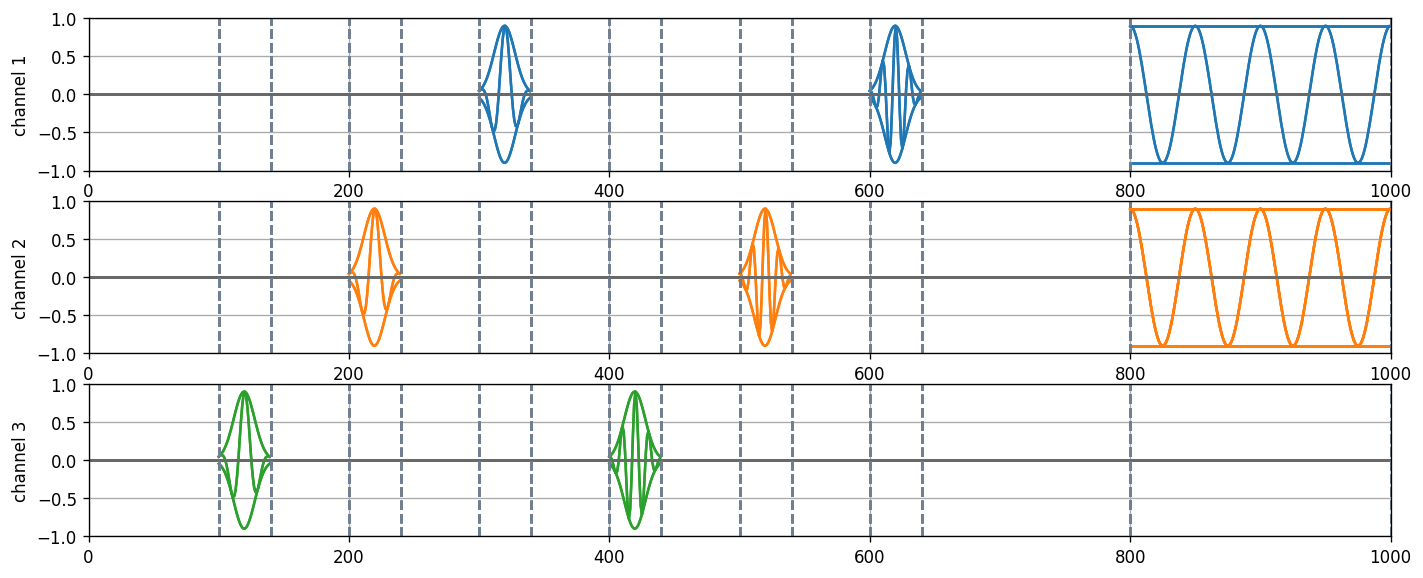

In [51]:
pc.plot()

In [4]:
p1 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 1, PulseType.DRIVE)
pc = PulseCollection(p1)
assert pc.count == 1
pc *= 3
assert pc.count == 3
pc *= 3
assert pc.count == 9

In [7]:
p1 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 1, PulseType.DRIVE)
p2 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 2, PulseType.DRIVE)
pc = 2 * p2 + p1 * 3
assert pc.count == 5
assert pc[0] == p2 and pc[1] == p2 and pc[2] == p1 and pc[3] == p1 and pc[4] == p1

In [8]:
pc.insert(3, p2)
assert pc.count == 6
assert pc[0] == p2 and pc[1] == p2 and pc[2] == p1 and pc[3] == p2 and pc[4] == p1 and pc[4] == p1

In [9]:
pc.clear()
assert pc.count == 0
assert pc.is_empty

In [4]:
p1 = Pulse(20, 40, 0.9, 200e6, 0, Drag(5,1), 1, PulseType.DRIVE)
p2 = Pulse(60, 1000, 0.9, 20e6, 0, Rectangular(), 2, PulseType.READOUT)
pc = p1 + p2
assert pc.start == p1.start
assert pc.finish == p2.finish


In [6]:
p1 = DrivePulse(0, 400, 0.9, 20e6, 0, Gaussian(5), 10)
p2 = ReadoutPulse(100, 400, 0.9, 20e6, 0, Rectangular(), 30)
p3 = DrivePulse(300, 400, 0.9, 20e6, 0, Drag(5,50), 20)
p4 = DrivePulse(400, 400, 0.9, 20e6, 0, Drag(5,50), 30)
p5 = ReadoutPulse(500, 400, 0.9, 20e6, 0, Rectangular(), 20)
p6 = DrivePulse(600, 400, 0.9, 20e6, 0, Gaussian(5), 30)

pc = PulseCollection(p1, p2, p3, p4, p5, p6)
assert pc.channels == [10, 20, 30]
assert pc.get_channel_pulses(channel = 10).count == 1 
assert pc.get_channel_pulses(channel = 20).count == 2 
assert pc.get_channel_pulses(channel = 30).count == 3 

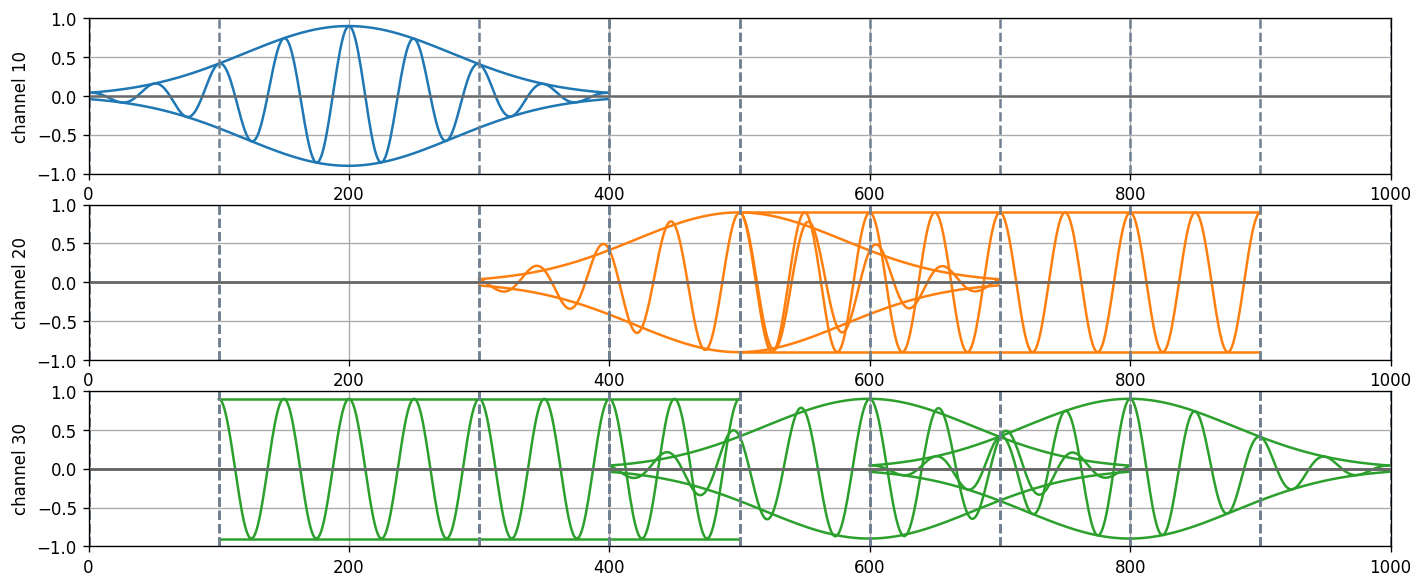

In [7]:
pc.plot()

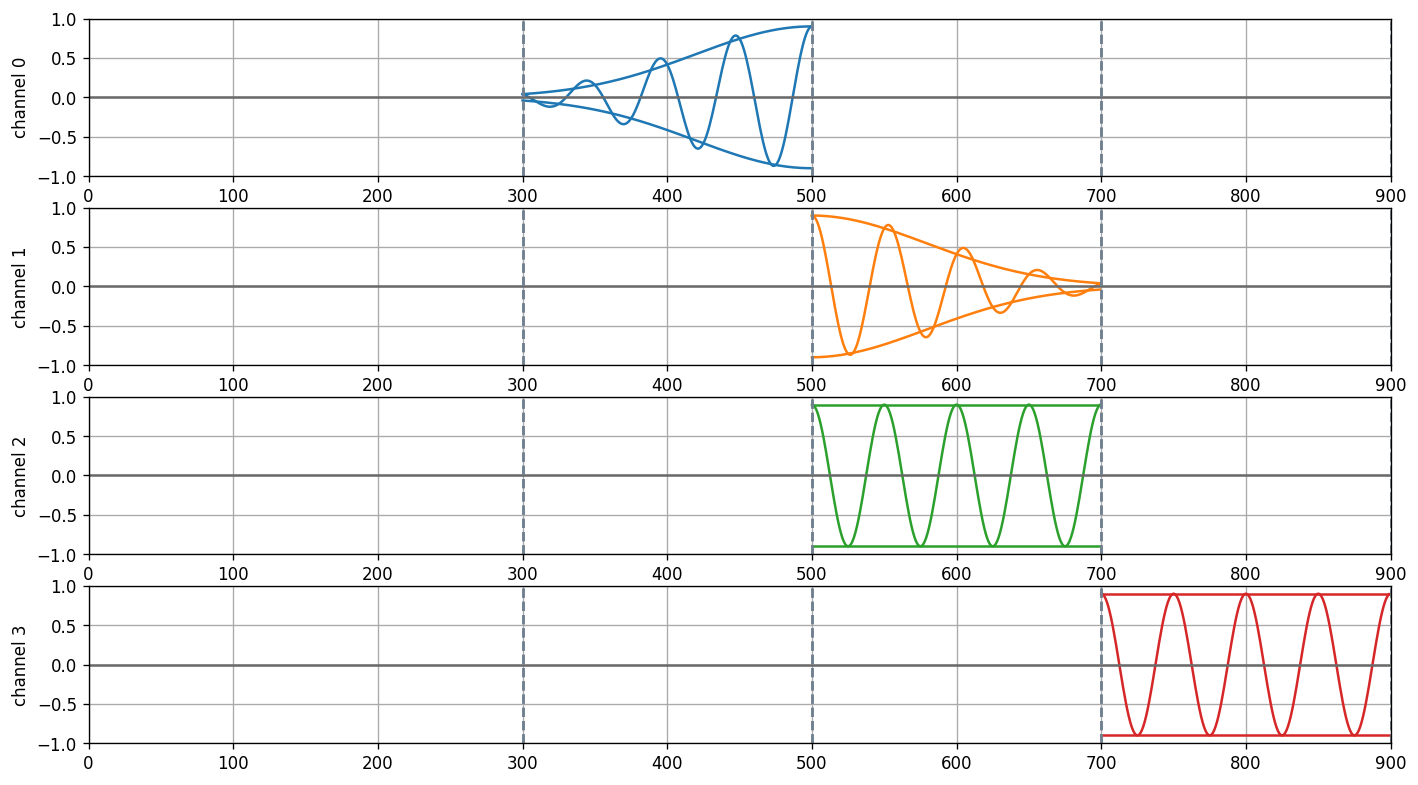

In [11]:
assert pc.pulses_overlap == True
assert pc.get_channel_pulses(channel = 10).pulses_overlap == False
assert pc.get_channel_pulses(channel = 20).pulses_overlap == True
assert pc.get_channel_pulses(channel = 30).pulses_overlap == True

channel10_pc = pc.get_channel_pulses(channel = 10)
channel20_pc = pc.get_channel_pulses(channel = 20)
channel30_pc = pc.get_channel_pulses(channel = 30)

split_pulses = PulseCollection()
overlaps = channel20_pc.get_pulse_overlaps()
n = 0
for section in overlaps.keys():
    for pulse in overlaps[section]:
        sp = SplitPulse(pulse, section[0], section[1])
        sp.channel = n
        split_pulses.append(sp)
        n += 1
split_pulses.plot()



In [2]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t0 = TimeVariable(0)
t = TimeVariable(0)
p1 = DrivePulse(t0, 400, 0.9, 20e6, 0, Gaussian(5), 10)
p2 = ReadoutPulse(p1.tv_finish + t, 400, 0.9, 20e6, 0, Rectangular(), 30)
p3 = DrivePulse(p2.tv_finish, 400, 0.9, 20e6, 0, Drag(5,50), 20)
pc = p1 + p2 + p3

@widgets.interact(start=(0, 1000, 100), t_between=(0, 1000, 100))
def update(start = 0, t_between = 0):
    t.value = t_between
    t0.value = start
    pc.plot()

interactive(children=(IntSlider(value=0, description='start', max=1000, step=100), IntSlider(value=0, descript…